In [29]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [30]:
"""
Ingredients :
sigmoid function
log cost function -(ylg-(1-y)lg)

"""
#Follow pandas method for awesome plots & describe functions
train_df = pd.read_csv('train.csv',sep=',')
# train_df.info()
# print(train_df.describe())
train_df=train_df.drop('Id',axis=1) #axis 0 is horiz. 1 is vert

train_df=np.array(train_df)

In [105]:
# np.sum does column wise thing
# h = 1/(1+e^-XTheta)
# J = sum(-log(h)y-log(1-h)(1-y))/m
# delJ is checked to be sum(x*(h-y))/m

# def sigmoid(z):    return np.array(map(float,list(map(lambda x:1/(1+(np.e)**(-x)) , z))))

def normalize(x):
    x_means = np.mean(x,axis=0)
    x_stds = np.std(x,axis=0)
    for i in range(n):
        norm = (x[:,i]-x_means[i])/x_stds[i]
        x[:,i] = norm

def getH(X,theta):
    h = np.matmul(X,theta) #becomes m x 1
    return 1/(1+np.exp(-h))
    
def calcCost(m,h,y):
    J = np.sum(np.log(h)*y + np.log(1-h)*(1-y))/m*-1
    return J

def getGrad(m,h,y):
    delJ = np.matmul(X.T,h-y)
    return delJ

def gradDescent(theta,m,h,y,alpha=0.01):
    grad = getGrad(m,h,y)
    theta = theta - (alpha/m)*grad
    return theta


('error', 0.017313522482291177)
('Theta', array([[ -4.04806483e+00],
       [  1.84428447e-02],
       [  1.51883765e-02],
       [  1.70568346e-02],
       [ -1.70909549e-02],
       [  6.92255421e-04],
       [  2.02111762e-02]]))


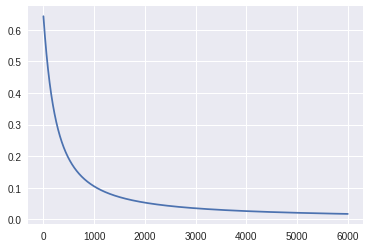

In [113]:
figsize=(20,10)
datasize=1000
featsize=6
X=train_df[:datasize,1:featsize+1]
y=train_df[:datasize,-1]
X=X.astype('float32')
m,n=X.shape
y=y.reshape((m,1))
ones= np.array([[1] for i in range(m)])
normalize(X)
y[np.where(y<2)]=0
y[np.where(y>=2)]=1
X = np.concatenate((ones,X),axis=1)
iterations = 6000

theta=np.random.randn(n+1,1)*0.1

%matplotlib inline
J_hist=[]
t_hist=[]
for i in range(iterations):
    h = getH(X,theta)
    J= calcCost(m,h,y)
    theta = gradDescent(theta,m,h,y,alpha=0.01)
    J_hist.append(J)
    t_hist.append(theta)

#final trained values
h_hist = getH(X,theta)
plt.plot(J_hist)
print("error",J_hist[-1])
print("Theta",t_hist[-1])
